In [5]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
from ml_time_series import generate_envelope
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import pyedflib

%matplotlib notebook

In [2]:
def plot_fremg(FILE_,Xc):    
    
    fig = plt.figure()
    ax1 = plt.subplot(4, 1, 1).xaxis.set_visible(False)
    plt.plot(Xc[:, 0], linewidth=0.2)
    plt.xlabel('Samples')
    plt.ylabel('mV').set_rotation(0)
    plt.title('Channel 1')
    plt.show()
    
    # pass sharey=ax1 to ensure the two subplots share the same y axis
    ax2 = plt.subplot(4, 1, 2, sharey=ax1).xaxis.set_visible(False)
    plt.plot(Xc[:, 1], linewidth=0.2)
    plt.xlabel('Samples')
    plt.ylabel('mV').set_rotation(0)
    plt.title('Channel 2')
    plt.show()
    
    ax3 = plt.subplot(4, 1, 3, sharey=ax1).xaxis.set_visible(False)
    plt.plot(Xc[:, 2], linewidth=0.2)
    plt.xlabel('Samples')
    plt.ylabel('mV').set_rotation(0)
    plt.title('Channel 3')
    plt.show()
    
    ax4 = plt.subplot(4, 1, 4, sharey=ax1)
    plt.plot(Xc[:, 3], linewidth=0.2)
    plt.xlabel('Samples')
    plt.ylabel('mV').set_rotation(0)
    plt.title('Channel 4')
    plt.show()
    
    #fig_name = FILE_+'_filtered'+str(180)+'.png'
    fig.set_size_inches(w=10,h=7)
    #fig.savefig('./graphs/'+fig_name)

In [21]:
i = 'Antonio Rodrigues - Dia 17.09.20 as 15.16.48.edf'

In [22]:
file_name = pyedflib.EdfReader('edf/'+i)
n = file_name.signals_in_file
signal_labels = file_name.getSignalLabels()
sigbufs = np.zeros((n, file_name.getNSamples()[0]))
for j in np.arange(n):
     sigbufs[j, :] = file_name.readSignal(j)

file_name._close()

In [23]:
X = np.transpose(sigbufs)

<IPython.core.display.Javascript object>


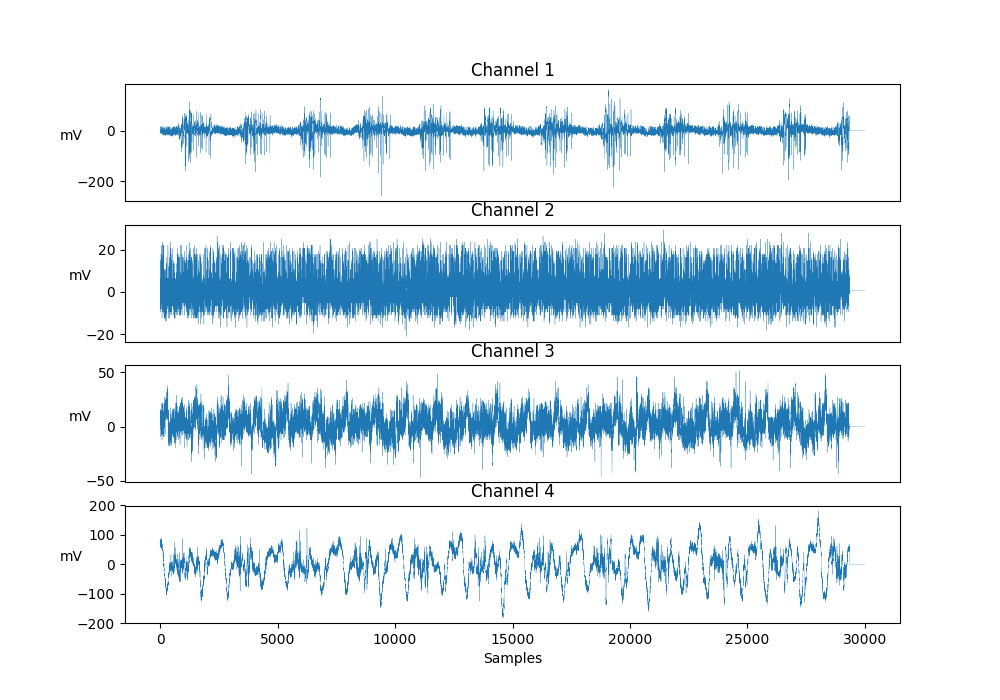

In [24]:
plot_fremg(i,X)

In [25]:
def plot_fft(Xc, fs):
    X =np.abs(np.fft.fft(Xc[:, 0]))
    f =np.linspace(0, fs,Xc[:, 0].shape[0])
    fig = plt.figure()
    ax1 = plt.subplot(4, 1, 1).xaxis.set_visible(False)
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel('Frequency')
    plt.ylabel('mV').set_rotation(0)
    plt.title('FFT')

    # pass sharey=ax1 to ensure the two subplots share the same y axis
    X =np.abs(np.fft.fft(Xc[:, 1]))
    f =np.linspace(0, fs,Xc[:, 1].shape[0])
    ax2 = plt.subplot(4, 1, 2, sharey=ax1).xaxis.set_visible(False)
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel('Frequency')
    plt.ylabel('mV').set_rotation(0)
    #plt.title('Channel 2')

    X =np.abs(np.fft.fft(Xc[:, 2]))
    f =np.linspace(0, fs,Xc[:, 2].shape[0])
    ax3 = plt.subplot(4, 1, 3, sharey=ax1).xaxis.set_visible(False)
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel('Frequency')
    plt.ylabel('mV').set_rotation(0)
    #plt.title('Channel 3')
    
    X =np.abs(np.fft.fft(Xc[:, 3]))
    f =np.linspace(0, fs,Xc[:, 3].shape[0])
    ax4 = plt.subplot(4, 1, 4, sharey=ax1)
    plt.plot(f,X, linewidth=0.2)
    plt.xlabel('Frequency')
    plt.ylabel('mV').set_rotation(0)
    #plt.title('Channel 4')
    
    fig.set_size_inches(w=10,h=7)

<IPython.core.display.Javascript object>


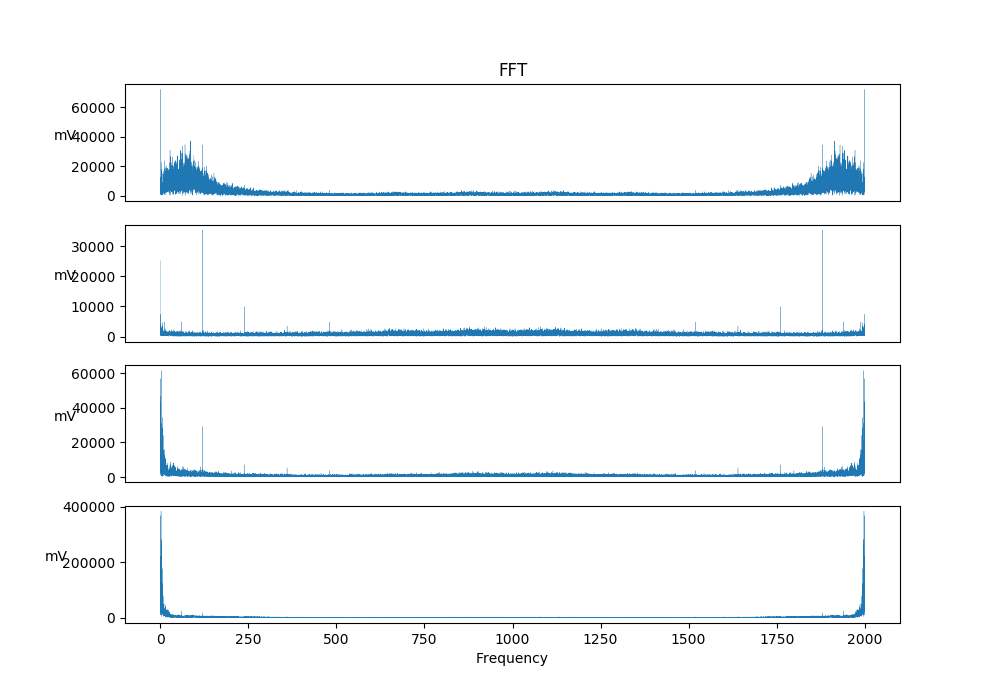

In [29]:
plot_fft(X,2000)